# 1. Import required modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage import data
import skimage
from skimage.filters.thresholding import threshold_li,threshold_local,threshold_otsu
from skimage.morphology import erosion, dilation, opening, closing, white_tophat, remove_small_objects, ball
from skimage.morphology import disk
from scipy import ndimage as ndi
import sys,os, glob

#import skimage.filters.median

#import skimage.segmentation as seg
#import skimage.filters as filters
#import skimage.draw as draw
#import skimage.color as color

#from skimage.filters.thresholding import _cross_entropy
#from skimage.morphology import black_tophat, skeletonize, convex_hull_image


#pip install nd2reader_required for nd2 file reading
from nd2reader import ND2Reader

import pandas as pd

c:\programdata\anaconda3\lib\site-packages\skimage\io\manage_plugins.py:23: UserWarning: Your installed pillow version is < 7.1.0. Several security issues (CVE-2020-11538, CVE-2020-10379, CVE-2020-10994, CVE-2020-10177) have been fixed in pillow 7.1.0 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


# 2. Define common parameters for measurement loading here:

In [2]:
# load experiment exp1

analysis_fd = r'D:\Analyzed_CellBio\Stam\211122IF_211101exp_Mdc1ab_45h\cov2_Mdc1-568 H3K9ac-488 PolS5-647\analysis_subset_controlled'

exp1_df = pd.read_excel(analysis_fd + os.sep + 'measurement_for_all_fov_background_subtracted_2_100_crop.xlsx')

In [3]:
# load experiment exp2

analysis_fd = r'D:\Analyzed_CellBio\Stam\211125IF_211121exp_Mdc1ab_45h\cov1_Mdc1-568 H3K9ac-488 PolS5-647\analysis_subset_controlled'

exp2_df = pd.read_excel(analysis_fd + os.sep + 'measurement_for_all_fov_background_subtracted_2_100_crop.xlsx')

In [4]:
combined_df = pd.concat([exp1_df,exp2_df])


print(len(exp1_df))

print(len(exp2_df))


print(len(combined_df))


measurement_for_all_fov_df = combined_df

198
304
502


# 3. Post-hoc analysis examples

In [5]:
#len(measurement_for_all_fov_df)


analysis_save_path = r'D:\Analyzed_CellBio\Stam\Mdc1_fixed_analysis'

analysis_savename = 'mdc-568_h3k9ac_pol2_analyzed.xlsx'

In [6]:
# remove the bad cell that has no Pol2 signal
analysis_df=measurement_for_all_fov_df[measurement_for_all_fov_df['ave_intensity_control_chr_Pol2S5']>0].copy()

print(len(analysis_df))

#analysis_df.to_excel(analysis_save_path+os.sep+analysis_savename, index=False)

502


In [7]:
# remove the bad cell that has no Pol2 signal
#analysis_df=measurement_for_all_fov_df[measurement_for_all_fov_df['ave_intensity_control_chr_Pol2S5']>0].copy()

# for total incorporated chr
analysis_df['normalized_inc_Pol2S5']=analysis_df['ave_intensity_incorporated_chr_Pol2S5']/analysis_df['ave_intensity_nucleo-excluded_control_chr_Pol2S5']
print(analysis_df['normalized_inc_Pol2S5'].mean())


# for subset control
analysis_df['normalized_subset_control_Pol2S5']=analysis_df['ave_intensity_subset_control_chr_Pol2S5']/analysis_df['ave_intensity_nucleo-excluded_control_chr_Pol2S5']
print(analysis_df['normalized_subset_control_Pol2S5'].mean())



# get the h2ax-positive area vs h2ax-less (positive) area for the same cell
analysis_df['normalized_inc_H3K9ac'] = analysis_df['ave_intensity_incorporated_chr_H3K9ac']/analysis_df['ave_intensity_nucleo-excluded_control_chr_H3K9ac']
print(analysis_df['normalized_inc_H3K9ac'].mean())


# for subset control
analysis_df['normalized_subset_control_H3K9ac']=analysis_df['ave_intensity_subset_control_chr_H3K9ac']/analysis_df['ave_intensity_nucleo-excluded_control_chr_H3K9ac']
print(analysis_df['normalized_subset_control_H3K9ac'].mean())



# get the h2ax-positive area vs h2ax-less (positive) area for the same cell
analysis_df['normalized_inc_Mdc1'] = analysis_df['ave_intensity_incorporated_chr_Mdc1']/analysis_df['ave_intensity_nucleo-excluded_control_chr_Mdc1']
print(analysis_df['normalized_inc_Mdc1'].mean())


# for subset control
analysis_df['normalized_subset_control_Mdc1']=analysis_df['ave_intensity_subset_control_chr_Mdc1']/analysis_df['ave_intensity_nucleo-excluded_control_chr_Mdc1']
print(analysis_df['normalized_subset_control_Mdc1'].mean())





# get the h2ax-positive area vs h2ax-less (positive) area for the same cell
analysis_df['normalized_inc_dna'] = analysis_df['ave_intensity_incorporated_chr_dna']/analysis_df['ave_intensity_nucleo-excluded_control_chr_dna']
print(analysis_df['normalized_inc_dna'].mean())


# for subset control
analysis_df['normalized_subset_control_dna']=analysis_df['ave_intensity_subset_control_chr_dna']/analysis_df['ave_intensity_nucleo-excluded_control_chr_dna']
print(analysis_df['normalized_subset_control_dna'].mean())

0.7592152648537023
1.0205115336344646
0.7761426815957787
1.0029185757077945
5.082186164976385
1.0203693224002441
1.1121924965661698
1.0041091323525537


In [8]:
analysis_df

,Unnamed: 0,exp_name,position_id,cell_id,cell_xyz_coord,area_incorporated_chr,area_h2ax_within_incorporated_chr,area_less_h2ax_within_incorporated_chr,area_control_chr,area_nucleo-excluded_control_chr,...,ave_intensity_h2ax_pos_incorporated_chr_Pol2S5,ave_intensity_h2ax_less_incorporated_chr_Pol2S5,normalized_inc_Pol2S5,normalized_subset_control_Pol2S5,normalized_inc_H3K9ac,normalized_subset_control_H3K9ac,normalized_inc_Mdc1,normalized_subset_control_Mdc1,normalized_inc_dna,normalized_subset_control_dna
0,0,cov2_Mdc1-568 H3K9ac-488 PolS5-647,RPE1 atcc noco45h Mdc1-568 H3K9ac-488 RNApol64...,4,"[[1009, 753], 4]",342,0,342,18339,5157,...,NaN,1275.064437,0.665977,0.977054,0.798147,1.034100,4.101546,0.846629,1.048396,1.002282
1,0,cov2_Mdc1-568 H3K9ac-488 PolS5-647,RPE1 atcc noco45h Mdc1-568 H3K9ac-488 RNApol64...,7,"[[955, 318], 4]",161,0,161,12014,3731,...,NaN,517.650995,0.531182,1.043187,0.852813,1.033086,4.158451,0.901480,0.725400,0.927833
2,0,cov2_Mdc1-568 H3K9ac-488 PolS5-647,RPE1 atcc noco45h Mdc1-568 H3K9ac-488 RNApol64...,9,"[[563, 512], 5]",116,0,116,11410,3367,...,NaN,1360.482407,1.495851,0.923852,1.067169,1.027633,19.433452,0.630781,0.816240,0.969515
3,0,cov2_Mdc1-568 H3K9ac-488 PolS5-647,RPE1 atcc noco45h Mdc1-568 H3K9ac-488 RNApol64...,11,"[[1094, 885], 4]",747,0,747,12083,3603,...,NaN,898.833195,0.587073,0.926983,0.997998,1.049734,9.709731,1.896187,1.127177,0.883526
4,0,cov2_Mdc1-568 H3K9ac-488 PolS5-647,RPE1 atcc noco45h Mdc1-568 H3K9ac-488 RNApol64...,19,"[[576, 1220], 5]",125,0,125,15719,4069,...,NaN,701.095310,0.655391,0.708817,0.892186,0.994393,14.772285,0.566470,0.784293,0.736730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,0,cov1_Mdc1-568 H3K9ac-488 PolS5-647,RPE1 atcc noco45h Mdc1-568 H3K9ac-488 RNApol64...,9,"[[1386, 675], 5]",194,0,194,14321,3470,...,NaN,193.948300,1.105043,1.311921,0.856547,1.114543,3.397596,1.122793,0.962591,0.866710
300,0,cov1_Mdc1-568 H3K9ac-488 PolS5-647,RPE1 atcc noco45h Mdc1-568 H3K9ac-488 RNApol64...,13,"[[1074, 1026], 4]",680,0,680,16310,3892,...,NaN,179.475137,0.704969,0.816049,0.876881,0.917232,9.044680,1.109901,0.966439,0.945513
301,0,cov1_Mdc1-568 H3K9ac-488 PolS5-647,RPE1 atcc noco45h Mdc1-568 H3K9ac-488 RNApol64...,15,"[[1002, 1182], 4]",326,0,326,22360,5816,...,NaN,358.699219,1.015796,1.116434,0.935992,0.997094,4.073513,0.942500,1.011988,1.127846
302,0,cov1_Mdc1-568 H3K9ac-488 PolS5-647,RPE1 atcc noco45h Mdc1-568 H3K9ac-488 RNApol64...,21,"[[1124, 1628], 4]",195,1,194,16262,2687,...,NaN,146.579907,0.698975,0.798516,0.509995,1.094241,4.780053,0.743685,0.789611,0.935878


In [10]:
#analysis_savename = 'rpe1_h3k27_pol2_analyzed.xlsx'

analysis_df.to_excel(analysis_save_path+os.sep+analysis_savename, index=False)

MW comparision: 9.228637810920632e-08


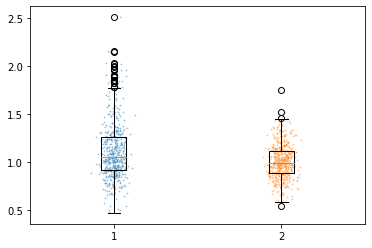

In [9]:
# for dna

# 
g1 = analysis_df['normalized_inc_dna']
g2 = analysis_df['normalized_subset_control_dna']
#g3 = no_damaged_chr_df['normalized_inc_Pol2S5']
#g4 = analysis_df['normalized_subset_control_Pol2S5']

#sp_low = min(len(g1),len(g2),len(g3))
#sp_low = min(len(g1),len(g2), len(g3))

#g1 = np.random.choice(g1, sp_low)
#g2 = np.random.choice(g2, sp_low)
#g3 = np.random.choice(g3, sp_low)
#g4 = np.random.choice(g4, sp_low)

boxplot_pol2= plt.boxplot([g1,g2], meanline = True)


vals, xs = [], [] 

for i, subdf in enumerate([g1,g2]):
    #names.append(name)
    vals.append(subdf.tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))

for x, val in zip(xs, vals):
    plt.scatter(x, val,  s = 1, alpha=0.3)

from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
#p4 = kruskal(g1,g2,g3,g4)

U1, p1 = mannwhitneyu(g1,g2)

print(f"MW comparision: {p1}")



#print(f"three samples comparision: {p4}")

MW comparision: 5.053304868713952e-165


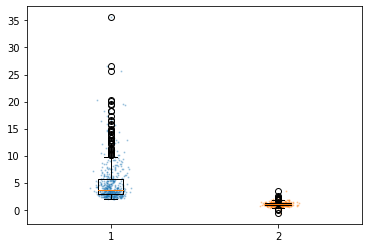

In [11]:
# for mdc1

# 
g1 = analysis_df['normalized_inc_Mdc1']
g2 = analysis_df['normalized_subset_control_Mdc1']
#g3 = no_damaged_chr_df['normalized_inc_Pol2S5']
#g4 = analysis_df['normalized_subset_control_Pol2S5']

#sp_low = min(len(g1),len(g2),len(g3))
#sp_low = min(len(g1),len(g2), len(g3))

#g1 = np.random.choice(g1, sp_low)
#g2 = np.random.choice(g2, sp_low)
#g3 = np.random.choice(g3, sp_low)
#g4 = np.random.choice(g4, sp_low)

boxplot_pol2= plt.boxplot([g1,g2], meanline = True)


vals, xs = [], [] 

for i, subdf in enumerate([g1,g2]):
    #names.append(name)
    vals.append(subdf.tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))

for x, val in zip(xs, vals):
    plt.scatter(x, val,  s = 1, alpha=0.3)

from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
#p4 = kruskal(g1,g2,g3,g4)

U1, p1 = mannwhitneyu(g1,g2)

print(f"MW comparision: {p1}")



#print(f"three samples comparision: {p4}")

MW comparision: 1.3258868978687765e-46


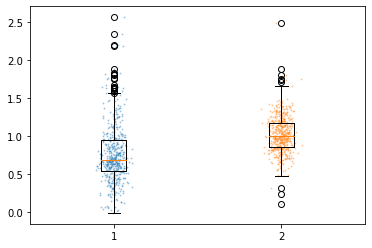

In [12]:
# For Pol2S5
g1 = analysis_df['normalized_inc_Pol2S5']
g2 = analysis_df['normalized_subset_control_Pol2S5']
#g3 = no_damaged_chr_df['normalized_inc_Pol2S5']
#g4 = analysis_df['normalized_subset_control_Pol2S5']

#sp_low = min(len(g1),len(g2),len(g3))
#sp_low = min(len(g1),len(g2), len(g3))

#g1 = np.random.choice(g1, sp_low)
#g2 = np.random.choice(g2, sp_low)
#g3 = np.random.choice(g3, sp_low)
#g4 = np.random.choice(g4, sp_low)

boxplot_pol2= plt.boxplot([g1,g2], meanline = True)


vals, xs = [], [] 

for i, subdf in enumerate([g1,g2]):
    #names.append(name)
    vals.append(subdf.tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))

for x, val in zip(xs, vals):
    plt.scatter(x, val,  s = 1, alpha=0.3)

from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
#p4 = kruskal(g1,g2,g3,g4)

U1, p1 = mannwhitneyu(g1,g2)

print(f"MW comparision: {p1}")



#print(f"three samples comparision: {p4}")

MW comparision: 9.142738980762545e-54


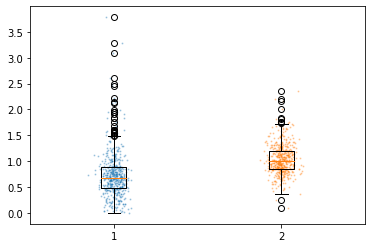

In [13]:
# For Pol2S5 norm to dna
g1 = analysis_df['normalized_inc_Pol2S5']/analysis_df['normalized_inc_dna']
g2 = analysis_df['normalized_subset_control_Pol2S5']/analysis_df['normalized_subset_control_dna']
#g3 = no_damaged_chr_df['normalized_inc_Pol2S5']
#g4 = analysis_df['normalized_subset_control_Pol2S5']

#sp_low = min(len(g1),len(g2),len(g3))
#sp_low = min(len(g1),len(g2), len(g3))

#g1 = np.random.choice(g1, sp_low)
#g2 = np.random.choice(g2, sp_low)
#g3 = np.random.choice(g3, sp_low)
#g4 = np.random.choice(g4, sp_low)

boxplot_pol2= plt.boxplot([g1,g2], meanline = True)


vals, xs = [], [] 

for i, subdf in enumerate([g1,g2]):
    #names.append(name)
    vals.append(subdf.tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))

for x, val in zip(xs, vals):
    plt.scatter(x, val,  s = 1, alpha=0.3)

from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
#p4 = kruskal(g1,g2,g3,g4)

U1, p1 = mannwhitneyu(g1,g2)

print(f"MW comparision: {p1}")



#print(f"three samples comparision: {p4}")

MW comparision: 1.3948767658242105e-55


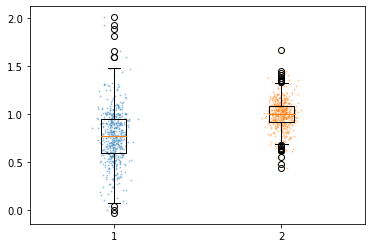

In [14]:
# For H2ax
g1 = analysis_df['normalized_inc_H3K9ac']
g2 = analysis_df['normalized_subset_control_H3K9ac']
#g3 = no_damaged_chr_df['normalized_inc_Pol2S5']
#g4 = analysis_df['normalized_subset_control_Pol2S5']

#sp_low = min(len(g1),len(g2),len(g3))
#sp_low = min(len(g1),len(g2), len(g3))

#g1 = np.random.choice(g1, sp_low)
#g2 = np.random.choice(g2, sp_low)
#g3 = np.random.choice(g3, sp_low)
#g4 = np.random.choice(g4, sp_low)

boxplot_pol2= plt.boxplot([g1,g2], meanline = True)


vals, xs = [], [] 

for i, subdf in enumerate([g1,g2]):
    #names.append(name)
    vals.append(subdf.tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))

for x, val in zip(xs, vals):
    plt.scatter(x, val,  s = 1, alpha=0.3)


from scipy.stats import kruskal
#p4 = kruskal(g1,g2,g3,g4)
from scipy.stats import mannwhitneyu
U1, p1 = mannwhitneyu(g1,g2)

print(f"MW comparision: {p1}")



#print(f"three samples comparision: {p4}")

MW comparision: 3.396823454164864e-55


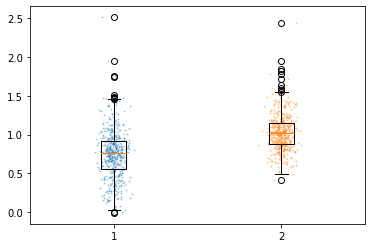

In [15]:
# For H2ax
g1 = analysis_df['normalized_inc_H3K9ac']/analysis_df['normalized_inc_dna']
g2 = analysis_df['normalized_subset_control_H3K9ac']/analysis_df['normalized_subset_control_dna']
#g3 = no_damaged_chr_df['normalized_inc_Pol2S5']
#g4 = analysis_df['normalized_subset_control_Pol2S5']

#sp_low = min(len(g1),len(g2),len(g3))
#sp_low = min(len(g1),len(g2), len(g3))

#g1 = np.random.choice(g1, sp_low)
#g2 = np.random.choice(g2, sp_low)
#g3 = np.random.choice(g3, sp_low)
#g4 = np.random.choice(g4, sp_low)

boxplot_pol2= plt.boxplot([g1,g2], meanline = True)


vals, xs = [], [] 

for i, subdf in enumerate([g1,g2]):
    #names.append(name)
    vals.append(subdf.tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))

for x, val in zip(xs, vals):
    plt.scatter(x, val,  s = 1, alpha=0.3)


from scipy.stats import kruskal
#p4 = kruskal(g1,g2,g3,g4)
from scipy.stats import mannwhitneyu
U1, p1 = mannwhitneyu(g1,g2)

print(f"MW comparision: {p1}")



#print(f"three samples comparision: {p4}")

In [16]:
from scipy import stats
stats.spearmanr(analysis_df['normalized_inc_Pol2S5'], analysis_df['normalized_inc_H3K9ac'])

SpearmanrResult(correlation=0.7506201192539399, pvalue=4.891949864549301e-92)

SpearmanrResult(correlation=0.7506201192539399, pvalue=4.891949864549301e-92)

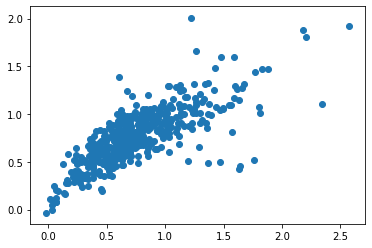

In [17]:
plt.scatter(x= analysis_df['normalized_inc_Pol2S5'], y =analysis_df['normalized_inc_H3K9ac'])

stats.spearmanr(analysis_df['normalized_inc_Pol2S5'], analysis_df['normalized_inc_H3K9ac'])

SpearmanrResult(correlation=0.7506201192539399, pvalue=4.891949864549301e-92)

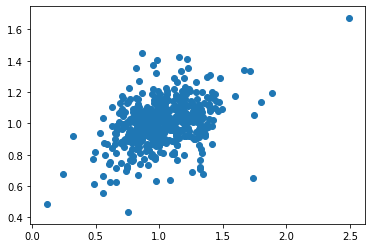

In [18]:
plt.scatter(x= analysis_df['normalized_subset_control_Pol2S5'], y =analysis_df['normalized_subset_control_H3K9ac'])

stats.spearmanr(analysis_df['normalized_inc_Pol2S5'], analysis_df['normalized_inc_H3K9ac'])

In [19]:
stats.spearmanr(analysis_df['normalized_subset_control_Pol2S5'], analysis_df['normalized_subset_control_H3K9ac'])

SpearmanrResult(correlation=0.3485546154805309, pvalue=8.720851290120551e-16)